In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "/Users/yiming/Documents/BigData/final_project/recommeation/input/backup"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

members.csv
sample_submission.csv
song_extra_info.csv
songs.csv
submission_lgbm_avg.csv.gz
test.csv
train.csv



In [6]:
df_train = pd.read_csv("/Users/yiming/Documents/BigData/final_project/recommeation/input/backup/train.csv")

df_songs = pd.read_csv("/Users/yiming/Documents/BigData/final_project/recommeation/input/backup/songs.csv")

df_songs_extra = pd.read_csv("/Users/yiming/Documents/BigData/final_project/recommeation/input/backup/song_extra_info.csv")

df_members = pd.read_csv("/Users/yiming/Documents/BigData/final_project/recommeation/input/backup/members.csv",parse_dates=["registration_init_time","expiration_date"])

df_test = pd.read_csv("/Users/yiming/Documents/BigData/final_project/recommeation/input/backup/test.csv")

print('part 2 complete')

part 2 complete


In [7]:
print("Number of common users in both the datasets : " ,len(set.intersection(set(df_train['msno']), set(df_test['msno']))))

Number of common users in both the datasets :  21483


In [8]:
print("Number of Common Songs in both the datasets : ", len(set.intersection(set(df_train['song_id']), set(df_test['song_id']))))

print("No of Unique songs in Training set :", df_train['song_id'].nunique())

print("No of Unique songs in Test set :" ,df_test['song_id'].nunique())

Number of Common Songs in both the datasets :  164880
No of Unique songs in Training set : 359966
No of Unique songs in Test set : 224753


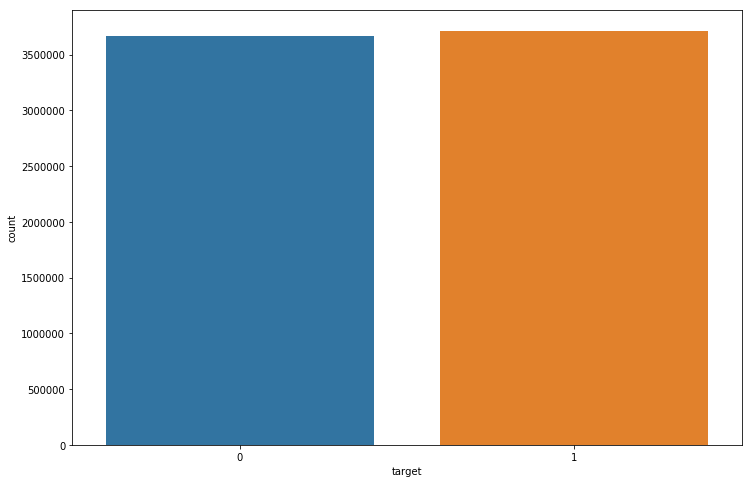

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(df_train['target'])

In [10]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [11]:
df_songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [12]:
df_train =df_train.merge(df_songs,how="left",on="song_id")

In [13]:
df_train =df_train.merge(df_songs_extra,how="left",on="song_id")

In [14]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


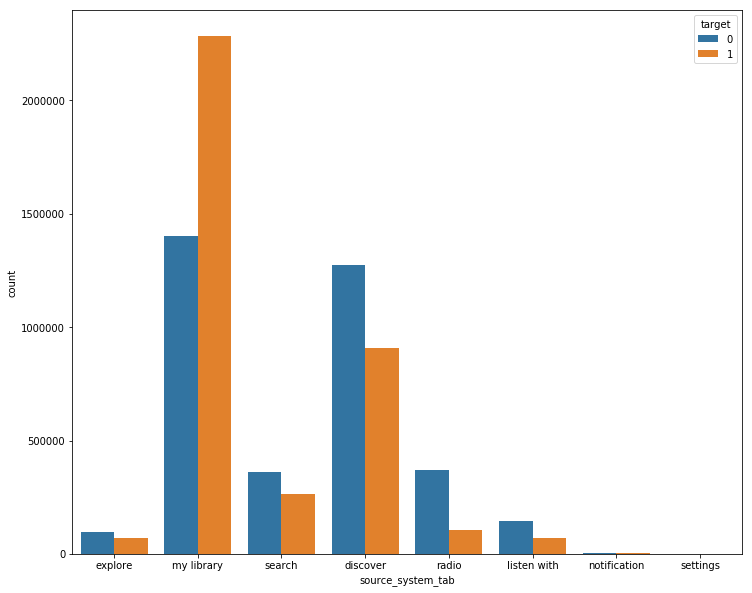

In [15]:
plt.figure(figsize=(12,10))
sns.countplot(df_train['source_system_tab'],hue=df_train['target'])

[Text(0,0,'online-playlist'),
 Text(0,0,'local-playlist'),
 Text(0,0,'local-library'),
 Text(0,0,'top-hits-for-artist'),
 Text(0,0,'album'),
 Text(0,0,'song-based-playlist'),
 Text(0,0,'radio'),
 Text(0,0,'song'),
 Text(0,0,'listen-with'),
 Text(0,0,'artist'),
 Text(0,0,'topic-article-playlist'),
 Text(0,0,'my-daily-playlist')]

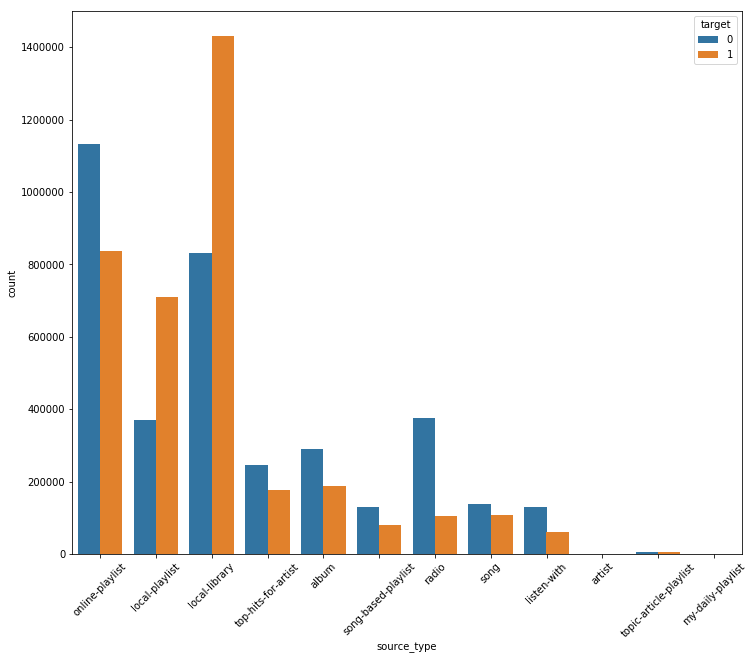

In [16]:
plt.figure(figsize=(12,10))
g = sns.countplot(df_train['source_type'],hue=df_train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [17]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [18]:
df_train.dropna(subset=["song_length"],inplace=True)

df_train.dropna(subset=["language"],inplace=True)

In [19]:
df_train['source_system_tab'] = df_train['source_system_tab'].astype("category")
df_train['source_type'] = df_train['source_type'].astype("category")

In [20]:
df_train['language'].value_counts()

 3.0     4044643
 52.0    1864789
 31.0     656623
-1.0      308752
 17.0     245136
 10.0     171904
 24.0      78621
 59.0       4193
 45.0       2397
 38.0        210
Name: language, dtype: int64

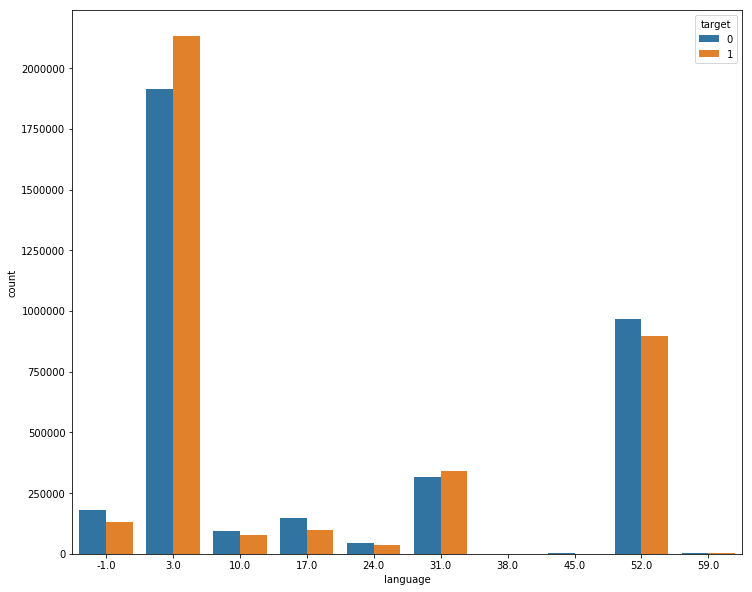

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(df_train['language'],hue=df_train['target'])

In [22]:
x = df_train['language'].value_counts()

In [23]:
df_len = len(df_train)
for lang_id,count in zip(df_train['language'].value_counts().index,df_train['language'].value_counts()) : 
    
    print(lang_id,":",(100*count / df_len))

3.0 : 54.82575663511208
52.0 : 25.277501102033977
31.0 : 8.900625543222775
-1.0 : 4.185180747127528
17.0 : 3.322856103370516
10.0 : 2.330185103753856
24.0 : 1.0657197217181211
59.0 : 0.056836758539882244
45.0 : 0.03249170289055515
38.0 : 0.0028465822307119654


In [25]:
df_train = df_train.merge(df_members,how="left",on="msno")

(-10, 100)

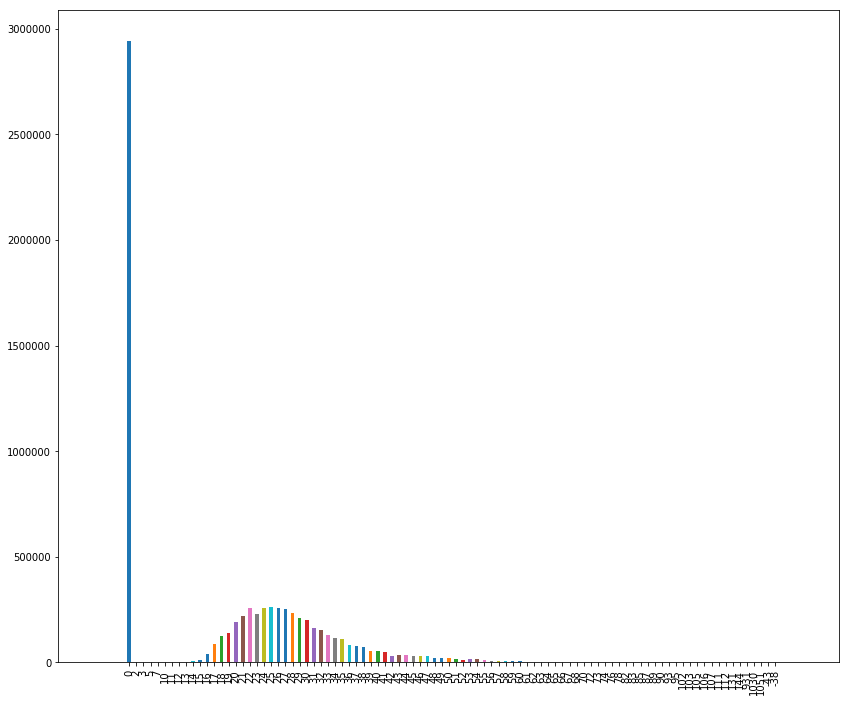

In [26]:
plt.figure(figsize=(14,12))
df_train['bd'].value_counts(sort=False).plot.bar()

plt.xlim([-10,100])

In [27]:
len(df_train.query("bd< 0"))

195

In [28]:
df_train = df_train.query("bd >= 0")

In [29]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,2012-01-02,2017-10-05


In [30]:
len(df_train.query("bd > 100"))

6508

In [31]:
df_train_temp = df_train.query("bd >=5 and bd <80")

In [32]:
df_train_temp['bd'].describe()

count    4.428397e+06
mean     2.871529e+01
std      8.589540e+00
min      5.000000e+00
25%      2.300000e+01
50%      2.700000e+01
75%      3.300000e+01
max      7.800000e+01
Name: bd, dtype: float64

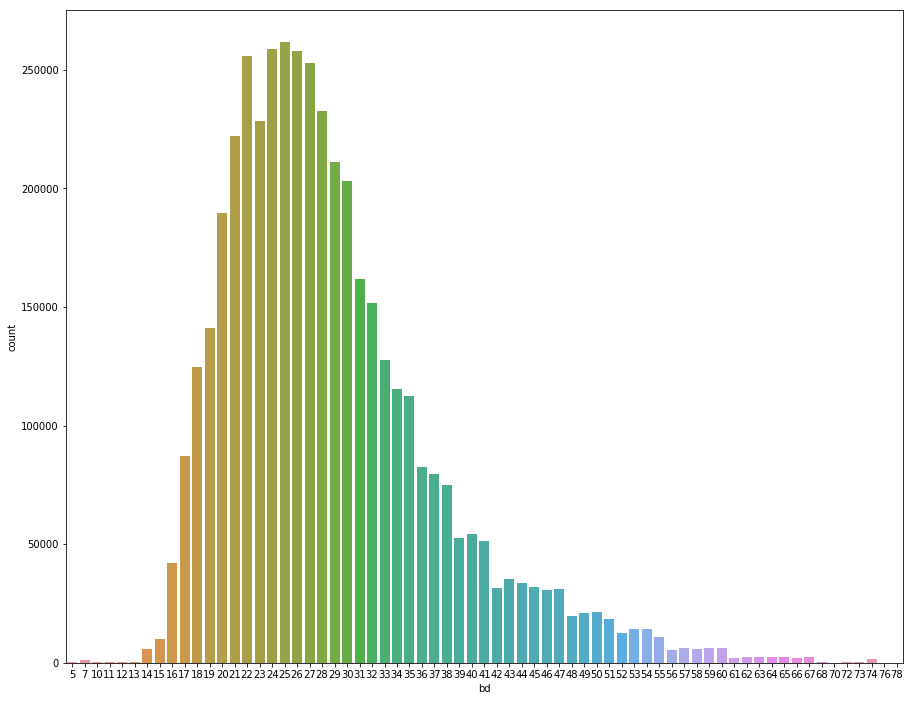

In [33]:
plt.figure(figsize=(15,12))
sns.countplot(df_train_temp['bd'])

In [34]:
df_train_temp['age_range'] = pd.cut(df_train_temp['bd'],bins=[5,10,18,30,45,60,80])

/Users/yiming/anaconda2/envs/root_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


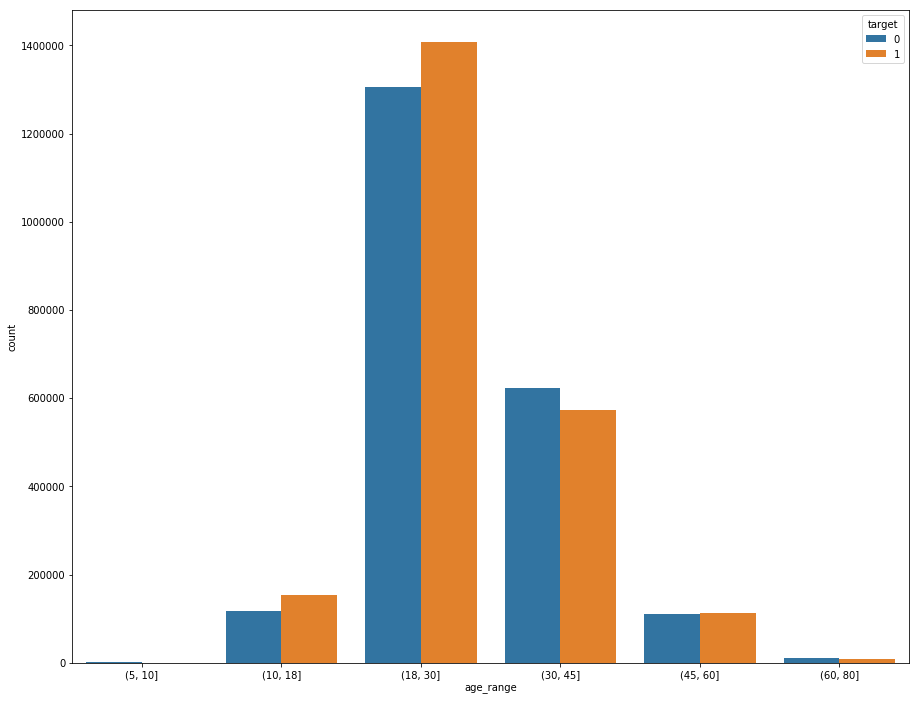

In [35]:
plt.figure(figsize=(15,12))
sns.countplot(df_train_temp['age_range'],hue=df_train_temp['target'])

In [36]:
df_train_temp['genre_ids'].value_counts().head()

465     2261970
458      762060
921      200929
1609     192818
444      138846
Name: genre_ids, dtype: int64

(0, 6)

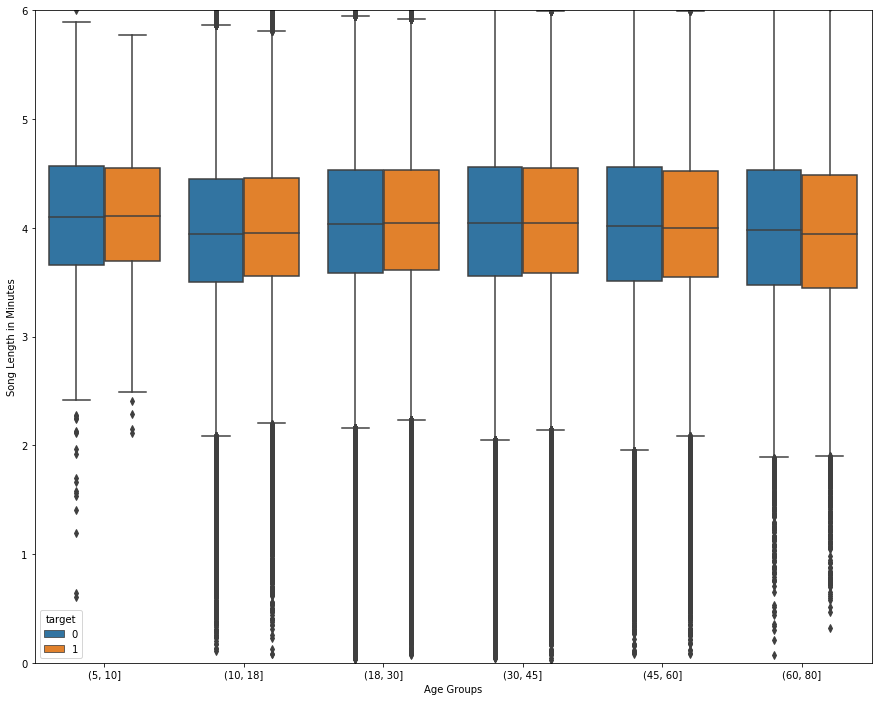

In [37]:
plt.figure(figsize=(15,12))
sns.boxplot(df_train_temp['age_range'],df_train_temp["song_length"]/60000,hue=df_train_temp['target'],)
plt.ylabel("Song Length in Minutes")
plt.xlabel("Age Groups")
plt.ylim([0,6])

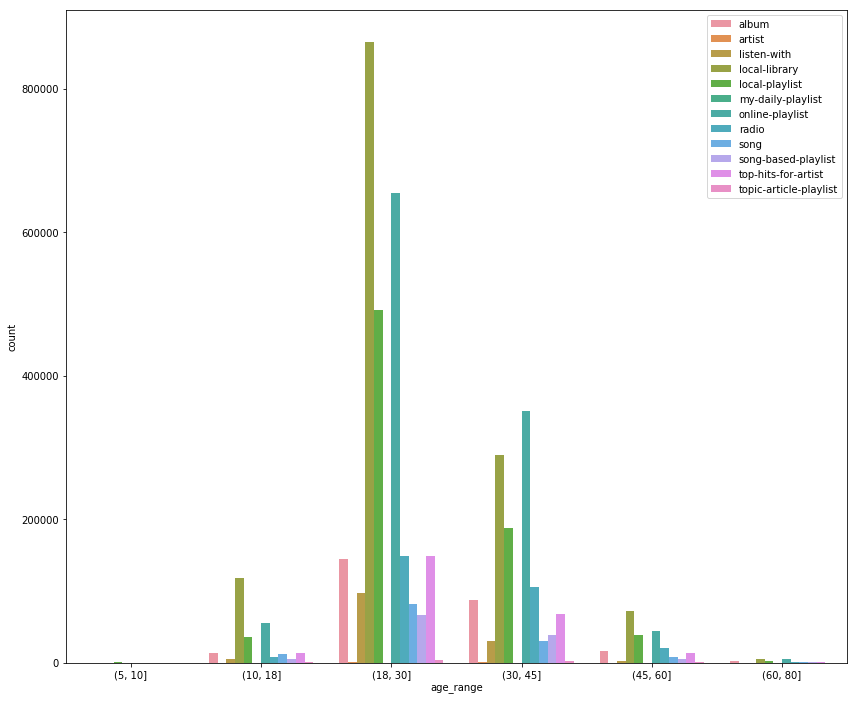

In [38]:
plt.figure(figsize=(14,12))
sns.countplot(df_train_temp['age_range'],hue=df_train_temp["source_type"])
plt.legend(loc="upper right")

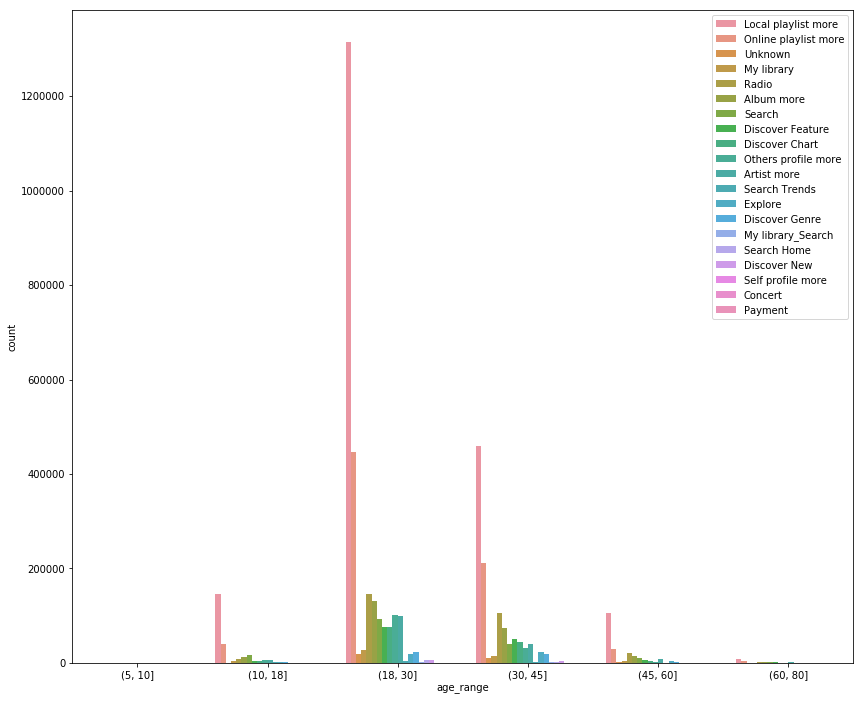

In [39]:
plt.figure(figsize=(14,12))
sns.countplot(df_train_temp['age_range'],hue=df_train_temp["source_screen_name"])
plt.legend(loc="upper right")

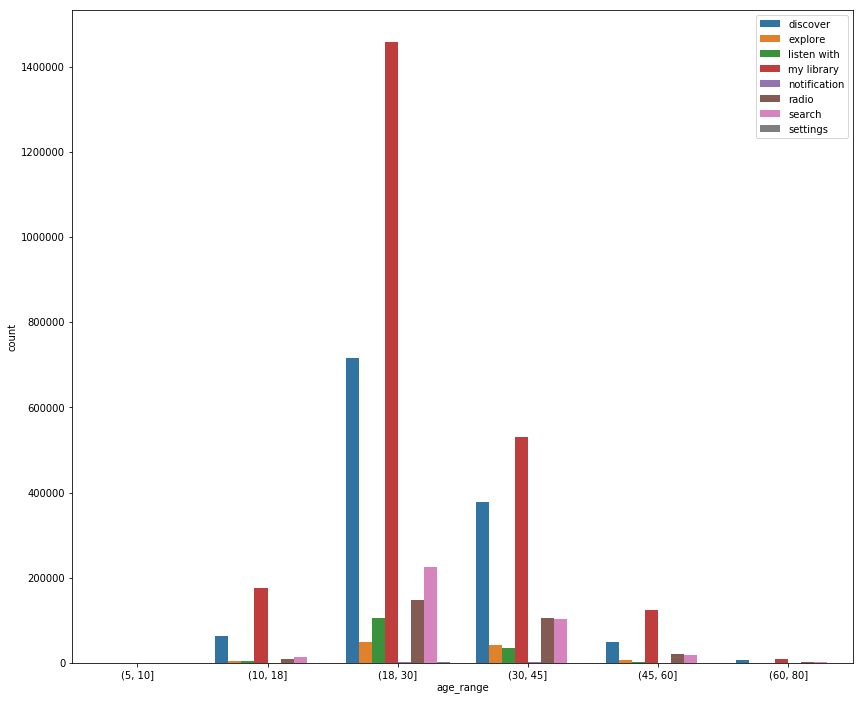

In [40]:
plt.figure(figsize=(14,12))
sns.countplot(df_train_temp['age_range'],hue=df_train_temp["source_system_tab"])
plt.legend(loc="upper right")

In [41]:
df_train_temp['gender'].value_counts()

male      2240904
female    2039243
Name: gender, dtype: int64

Text(0,0.5,'Count')

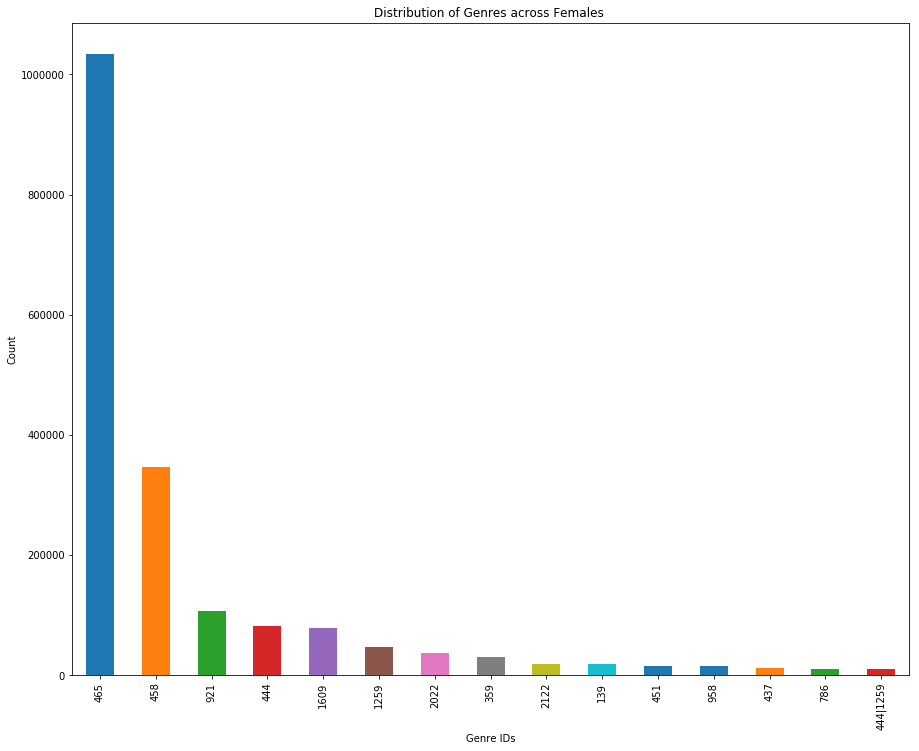

In [42]:
plt.figure(figsize=(15,12))
df_train_temp.query("gender =='female'")["genre_ids"].value_counts().head(15).plot.bar()
plt.title("Distribution of Genres across Females ")
plt.xlabel("Genre IDs")
plt.ylabel("Count")

Text(0,0.5,'Count')

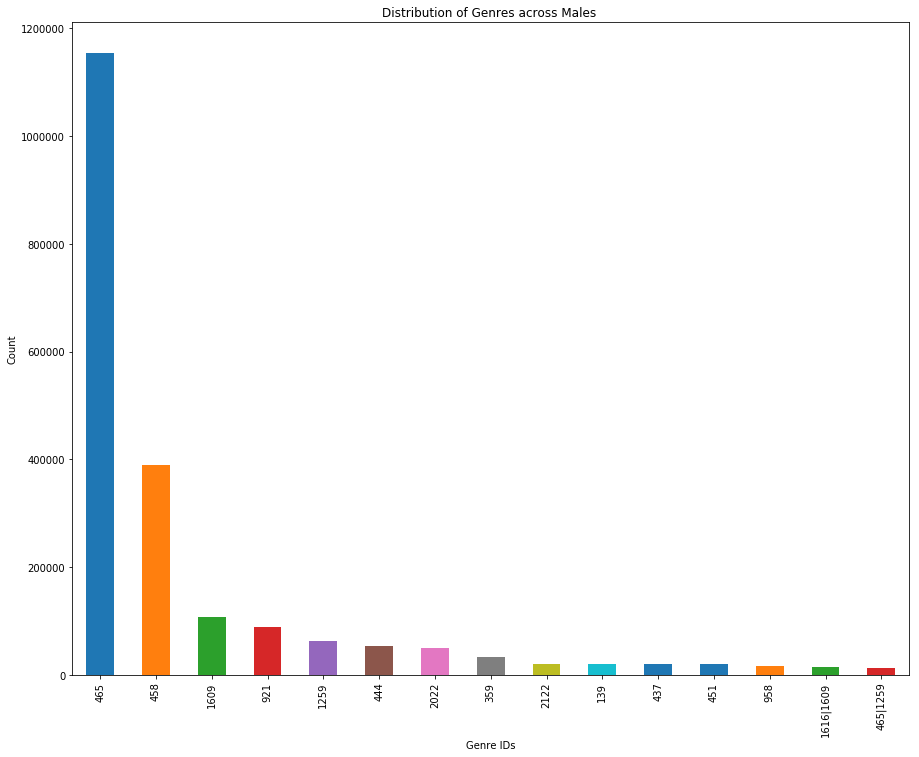

In [43]:
plt.figure(figsize=(15,12))
df_train_temp.query("gender =='male'")["genre_ids"].value_counts().head(15).plot.bar()
plt.title("Distribution of Genres across Males ")
plt.xlabel("Genre IDs")
plt.ylabel("Count")

In [44]:
df_train.drop("composer",axis=1,inplace=True)
df_train_temp.drop("composer",axis=1,inplace=True)

/Users/yiming/anaconda2/envs/root_python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
100 * len(df_train.query("bd< 0 or bd >80")) / len(df_train)

0.10031078721872483

In [46]:
df_train = df_train.query("bd> 0 and bd <=80")

In [47]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| TAEYANG,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,female,9,2011-05-25,2017-09-11
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,NaN,52.0,Dreaming Out Loud,USUM70759544,15,26,male,9,2011-11-07,2018-03-04


In [48]:
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [49]:
df_test.drop("composer",axis=1,inplace=True)

ValueError: labels ['composer'] not contained in axis

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429227 entries, 1 to 7377263
Data columns (total 19 columns):
msno                      object
song_id                   object
source_system_tab         category
source_screen_name        object
source_type               category
target                    int64
song_length               float64
genre_ids                 object
artist_name               object
lyricist                  object
language                  float64
name                      object
isrc                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(2), int64(4), object(9)
memory usage: 616.7+ MB


In [51]:
df_train['age_range'] = pd.cut(df_train_temp['bd'],bins=[5,10,18,30,45,60,80])

In [52]:
plt.figure(figsize=(14,12))
df_test['bd'].value_counts(sort=False).plot.bar()
plt.xlim([-10,80])

KeyError: 'bd'